# Introduction and preparing your data
In this chapter, you''ll learn about the typical challenges associated with fraud detection, and will learn how to resample your data in a smart way, to tackle problems with imbalanced data.

## Checking the fraud to non-fraud ratio
In this chapter, you will work on creditcard_sampledata.csv, a dataset containing credit card transactions data. Fraud occurrences are fortunately an extreme minority in these transactions.

However, Machine Learning algorithms usually work best when the different classes contained in the dataset are more or less equally present. If there are few cases of fraud, then there's little data to learn how to identify them. This is known as class imbalance, and it's one of the main challenges of fraud detection.

Let's explore this dataset, and observe this class imbalance problem.

In [1]:
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("data/creditcard_data.csv").drop('Unnamed: 0',axis=1)

# Explore the features available in your dataframe
print(df.iloc[:, :5].info())

# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 5 columns):
V1    5050 non-null float64
V2    5050 non-null float64
V3    5050 non-null float64
V4    5050 non-null float64
V5    5050 non-null float64
dtypes: float64(5)
memory usage: 197.3 KB
None
0    5000
1      50
Name: Class, dtype: int64
0    0.990099
1    0.009901
Name: Class, dtype: float64


As you can see, the ratio of fraudulent transactions is very low. This is a case of class imbalance problem, and you're going to learn how to deal with this in the next exercises.

## Plotting your data
From the previous exercise we know that the ratio of fraud to non-fraud observations is very low. You can do something about that, for example by re-sampling our data, which is explained in the next video.

In this exercise, you'll look at the data and visualize the fraud to non-fraud ratio. It is always a good starting point in your fraud analysis, to look at your data first, before you make any changes to it.

Moreover, when talking to your colleagues, a picture often makes it very clear that we're dealing with heavily imbalanced data. Let's create a plot to visualize the ratio fraud to non-fraud data points on the dataset df.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def prep_data(df):
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float)
    y = df.iloc[:, 29]
    y=np.array(y).astype(np.float)
    return X,y


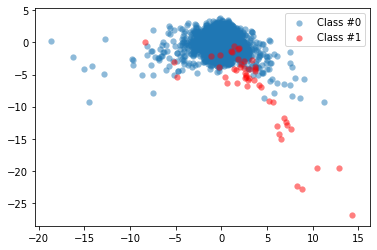

In [3]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

# Create X and y from the prep_data function
X, y = prep_data(df = df)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

By visualizing your data you can immediately see how our fraud cases are scattered over our data, and how few are cases we have. A picture often makes the imbalance problem often very clear. In the next exercises we'll visually explore how to improve our fraud to non-fraud balance.

## Applying SMOTE
In this exercise, you're going to re-balance our data using the Synthetic Minority Over-sampling Technique (SMOTE). Unlike ROS, SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class. SMOTE is therefore slightly more sophisticated than just copying observations, so let's apply SMOTE to our credit card data. The dataset df is available and the packages you need for SMOTE are imported. In the following exercise, you'll visualize the result and compare it to the original data, such that you can see the effect of applying SMOTE very clearly.

In [4]:
import imblearn